In [70]:

import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/asteroid-dataset/dataset.csv


In [71]:
#Upload the dataset
file_path = '/kaggle/input/asteroid-dataset/dataset.csv'
ast_data = pd.read_csv(file_path)
ast_data.describe()


<ipython-input-71-dc441ca118b7>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  ast_data = pd.read_csv(file_path)


,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [72]:
#Seperate features and target
X = ast_data.drop(columns=['diameter'])
y = ast_data['diameter'] #Target

In [73]:
#Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64','float']).columns.tolist()

#Identify categorical columns

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    X[col] = X[col].astype(str)
    
print("Numerical Cols", numerical_cols)
print("Categorical Cols", categorical_cols)

Numerical Cols ['spkid', 'H', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']
Categorical Cols ['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id', 'equinox', 'class']


In [74]:
#seperating data for H and albedo values
ast_test_2 = ast_data.dropna(subset=['H','albedo'])
ast_test_2.to_csv("ast_test_2.csv", index=False)
print(ast_test_2.head()) 
print(len(ast_test_2))

         id    spkid       full_name pdes     name prefix neo pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN   N   N  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN   N   N  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN   N   N  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN   N   N  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN   N   N  6.90   

   diameter  ...       sigma_i      sigma_om       sigma_w      sigma_ma  \
0   939.400  ...  4.608900e-09  6.168800e-08  6.624800e-08  7.820700e-09   
1   545.000  ...  3.469400e-06  6.272400e-06  9.128200e-06  8.859100e-06   
2   246.596  ...  3.223100e-06  1.664600e-05  1.772100e-05  8.110400e-06   
3   525.400  ...  2.170600e-07  3.880800e-07  1.789300e-07  1.206800e-06   
4   106.699  ...  2.740800e-06  2.894900e-05  2.984200e-05  8.303800e-06   

       sigma_ad       sigma_n      sigma_tp     sigma_per  class      rms  
0  1.111300e-11 

In [75]:
#1 Model data Preprocessing for the ast_data
missing_values = X[numerical_cols].isnull().sum()
print(missing_values[missing_values > 0])

H                   6263
albedo            823421
diameter_sigma    822443
ma                     1
ad                     4
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
rms                    2
dtype: int64


In [76]:
for col in numerical_cols:
    X[col].fillna(X[col].median(), inplace=True)

print(X[numerical_cols].isnull().sum())

<ipython-input-76-e80013ffe96c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


spkid             0
H                 0
albedo            0
diameter_sigma    0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
rms               0
dtype: int64


In [77]:
unique_counts = X[categorical_cols].nunique()
print(unique_counts)

missing_values = X[categorical_cols].isnull().sum()
print(missing_values[missing_values > 0])



id           958524
full_name    958524
pdes         958524
name          22065
prefix            2
neo               3
pha               3
orbit_id       4690
equinox           1
class            13
dtype: int64
Series([], dtype: int64)


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Define chunk size (adjust based on memory)
chunk_size = 10_000  
output_file = "encoded_data.csv"  # Save results to a CSV file

# Ordinal encoder setup
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Open file in write mode to store results
first_chunk = True  

# Process categorical columns in chunks
for col in categorical_cols:
    print(f"Encoding column: {col}...")

    # Open a new list to store processed chunks
    encoded_chunks = []

    for chunk in np.array_split(X[col].values, max(1, len(X) // chunk_size)):
        # Fit and transform each chunk using OrdinalEncoder
        encoded_chunk = ordinal_encoder.fit_transform(chunk.reshape(-1, 1))
        encoded_df = pd.DataFrame(encoded_chunk, columns=[col])  # Create DataFrame with the encoded values
        encoded_chunks.append(encoded_df)

    # Merge all processed chunks
    encoded_full_df = pd.concat(encoded_chunks, ignore_index=True)
    
    # Drop original categorical column
    X = X.drop(columns=[col])
    
    # Concatenate the new encoded columns
    X = pd.concat([X, encoded_full_df], axis=1)

    # Save processed data to disk
    if first_chunk:
        X.to_csv(output_file, index=False)  # Write headers for the first chunk
        first_chunk = False
    else:
        X.to_csv(output_file, mode="a", index=False, header=False)  # Append data

    # Free memory
    del encoded_chunks, encoded_full_df
    print(f"Finished encoding {col}")

print("Ordinal encoding completed successfully!")


Encoding column: id...
Finished encoding id
Encoding column: full_name...
Finished encoding full_name
Encoding column: pdes...
Finished encoding pdes
Encoding column: name...
Finished encoding name
Encoding column: prefix...
Finished encoding prefix
Encoding column: neo...
Finished encoding neo
Encoding column: pha...
Finished encoding pha
Encoding column: orbit_id...
Finished encoding orbit_id
Encoding column: equinox...
Finished encoding equinox
Encoding column: class...
Finished encoding class
Ordinal encoding completed successfully!


In [79]:
X.head()

# Check for missing values in the target column 'y'
missing_values = y.isnull().sum()

print(f"Number of missing values in target column: {missing_values}")


Number of missing values in target column: 822315


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X is your feature matrix and y is your target column

# Step 1: Identify missing target values
mask_missing = y.isnull()

# Data with available target values
X_train_available = X[~mask_missing]
y_train_available = y[~mask_missing]

# Data with missing target values
X_train_missing = X[mask_missing]

# Step 2: Preprocess the features (Standard Scaling)
scaler = StandardScaler()
X_train_available_scaled = scaler.fit_transform(X_train_available)
X_train_missing_scaled = scaler.transform(X_train_missing)

# Step 3: Build and train the neural network model
model = Sequential([
    Dense(128, input_dim=X_train_available_scaled.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_available_scaled, y_train_available, epochs=50, batch_size=32, verbose=1)

# Step 4: Predict missing target values
y_pred_missing = model.predict(X_train_missing_scaled)

# Step 5: Impute missing values in the target column
y_imputed = y.copy()
y_imputed[mask_missing] = y_pred_missing.flatten()  # Fill missing values with predictions

# Step 6: Combine X_train_available and X_train_missing with y_imputed
X_complete = pd.concat([X_train_available, X_train_missing], axis=0)
y_complete = y_imputed

# Ensure the index order is maintained
X_complete = X_complete.sort_index()
y_complete = y_complete.sort_index()

# Step 7: Optionally, evaluate model performance on available target values
y_pred_available = model.predict(X_train_available_scaled)
mse = mean_squared_error(y_train_available, y_pred_available)
print(f"Mean Squared Error on available target values: {mse}")




Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4257/4257 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 32.0068
Epoch 2/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 9.7537
Epoch 3/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 22.7102
Epoch 4/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 12.1760
Epoch 5/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 6.1227
Epoch 6/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 8.0559
Epoch 7/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 8.9915
Epoch 8/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 7.0873
Epoch 9/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 4.4891
Epoch 10/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2.9654
Epoch 11/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 4.6645
Epoch 12/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 4.0559
Epoch 13/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 6.6478
Epoch 14/50
4257/4257 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3.3499
Epoch 15/50
4257/4257 ━━━━━━━━━━━━━━━

In [81]:
# Print the imputed y values
print("Updated target values (y_complete):")
print(y_complete)


Updated target values (y_complete):
0         939.400000
1         545.000000
2         246.596000
3         525.400000
4         106.699000
             ...    
958519     18.855566
958520      1.302211
958521      0.712585
958522     10.515430
958523      9.031296
Name: diameter, Length: 958524, dtype: float64


In [25]:
#Now find the mutual information
from sklearn.feature_selection import mutual_info_regression

#Calculate mutual information between features and the imputed target
mutual_info = mutual_info_regression(X_complete, y_complete)

#Create a Dataframe
mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns = ['Mutual Information'])

#Sort the mutual information values in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending = False)

print(mutual_info_df)

                Mutual Information
H                         1.307766
moid_ld                   0.422533
moid                      0.421522
spkid                     0.409567
q                         0.379821
albedo                    0.360782
n                         0.337891
a                         0.337726
per_y                     0.333253
per                       0.333232
name                      0.295394
ad                        0.192180
class                     0.181046
diameter_sigma            0.180685
sigma_n                   0.169352
sigma_i                   0.157216
sigma_e                   0.142024
tp_cal                    0.132519
tp                        0.130542
sigma_om                  0.123279
orbit_id                  0.119134
rms                       0.114266
sigma_q                   0.100444
epoch_mjd                 0.099023
epoch                     0.098680
epoch_cal                 0.098214
sigma_a                   0.094214
sigma_ad            

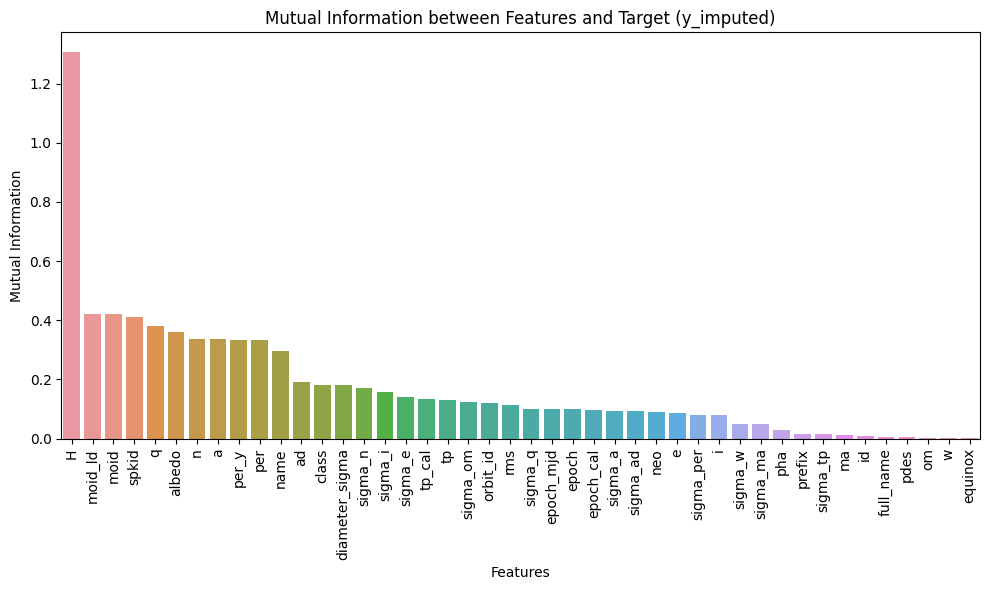

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot mutual information
plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info_df.index, y=mutual_info_df['Mutual Information'])

# Set plot labels and title
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information between Features and Target (y_imputed)')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [82]:
#Now exploring the data for only for albedo and H values

ast_test_2.head()


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [83]:
import pandas as pd
  
# Check for missing values in the 'diameter' column
missing_diameter = ast_test_2['diameter'].isnull().sum()

# Print the number of missing values
print(f"Number of missing values in 'diameter' column: {missing_diameter}")


Number of missing values in 'diameter' column: 3


In [84]:
#Remove the missing value rows
ast_test_2 = ast_test_2.dropna(subset=['diameter'])

In [85]:
import pandas as pd
import numpy as np


# Calculate the formula and store it in a new column 'formulae'
ast_test_2['formulae'] = np.abs((ast_test_2['albedo'] * (10 ** (0.4 * ast_test_2['H']))) ** 0.5)

# Verify the new column
print(ast_test_2[['albedo', 'H', 'formulae']].head())

# Optionally, save the updated dataset
ast_test_2.to_csv('ast_test_2_with_formulae.csv', index=False)


   albedo     H   formulae
0  0.0900  3.40   1.435890
1  0.1010  4.20   2.198673
2  0.2140  5.33   5.385263
3  0.4228  3.00   2.588615
4  0.2740  6.90  12.556693


In [87]:
X_2 = ast_test_2.drop(columns = ['diameter'])
y_2 = ast_test_2['diameter']
print(X_2.shape)  # Should be (n_samples, n_features)
print(y_2.shape)  # Should be (n_samples,)


(131237, 45)
(131237,)


In [88]:
#Identify numerical columns
numerical_cols_2 = X_2.select_dtypes(include=['int64','float']).columns.tolist()

#Identify categorical columns

categorical_cols_2 = X_2.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols_2:
    X_2[col] = X_2[col].astype(str)
    
print("Numerical Cols", numerical_cols_2)
print("Categorical Cols", categorical_cols_2)

Numerical Cols ['spkid', 'H', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms', 'formulae']
Categorical Cols ['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id', 'equinox', 'class']


In [89]:
#1 Model data Preprocessing for the ast_test_2
missing_values = X_2[numerical_cols_2].isnull().sum()
print(missing_values[missing_values > 0])

print(X_2.shape)  # Should be (n_samples, n_features)
print(y_2.shape)  # Should be (n_samples,)


diameter_sigma    95
dtype: int64
(131237, 45)
(131237,)


In [90]:
for col in numerical_cols_2:
    X_2[col].fillna(X_2[col].median(), inplace=True)

print(X_2[numerical_cols_2].isnull().sum())

print(X_2.shape)  # Should be (n_samples, n_features)
print(y_2.shape)  # Should be (n_samples,)


spkid             0
H                 0
albedo            0
diameter_sigma    0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
rms               0
formulae          0
dtype: int64
(131237, 45)
(131237,)


<ipython-input-90-3e414416dfac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_2[col].fillna(X_2[col].median(), inplace=True)


In [91]:
unique_counts_2 = X_2[categorical_cols_2].nunique()
print(unique_counts_2)

missing_values_2 = X_2[categorical_cols_2].isnull().sum()
print(missing_values_2[missing_values_2 > 0])

print(X_2.shape)  # Should be (n_samples, n_features)
print(y_2.shape)  # Should be (n_samples,)


id           131237
full_name    131237
pdes         131237
name          15143
prefix            1
neo               2
pha               2
orbit_id        405
equinox           1
class            11
dtype: int64
Series([], dtype: int64)
(131237, 45)
(131237,)


In [92]:
from sklearn.preprocessing import OrdinalEncoder


# Convert all categorical columns to strings (this ensures uniformity)
X_2[categorical_cols_2] = X_2[categorical_cols_2].astype(str)

# Handle missing values (replace NaNs with a placeholder)
X_2[categorical_cols_2] = X_2[categorical_cols_2].fillna('Unknown')

# Initialize and apply the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_2[categorical_cols_2] = encoder.fit_transform(X_2[categorical_cols_2])

# Convert encoded values to integers
X_2[categorical_cols_2] = X_2[categorical_cols_2].astype(int)

# Check the transformed DataFrame
print(X_2.head())


   id    spkid  full_name    pdes   name  prefix  neo  pha     H  albedo  ...  \
0   0  2000001       5108       0   2283       0    0    0  3.40  0.0900  ...   
1   1  2000002       5109   35916  10205       0    0    0  4.20  0.1010  ...   
2   2  2000003       5110   71229   6465       0    0    0  5.33  0.2140  ...   
3   3  2000004       5111   88174  14090       0    0    0  3.00  0.4228  ...   
4   4  2000005       5112  102156    942       0    0    0  6.90  0.2740  ...   

       sigma_om       sigma_w      sigma_ma      sigma_ad       sigma_n  \
0  6.168800e-08  6.624800e-08  7.820700e-09  1.111300e-11  1.196500e-12   
1  6.272400e-06  9.128200e-06  8.859100e-06  4.961300e-09  4.653600e-10   
2  1.664600e-05  1.772100e-05  8.110400e-06  4.363900e-09  4.413400e-10   
3  3.880800e-07  1.789300e-07  1.206800e-06  1.648600e-09  2.612500e-10   
4  2.894900e-05  2.984200e-05  8.303800e-06  4.729000e-09  5.522700e-10   

       sigma_tp     sigma_per  class      rms   formulae  
0  

In [93]:
print(X_2.shape)  # Should be (n_samples, n_features)
print(y_2.shape)  # Should be (n_samples,)




(131237, 45)
(131237,)


In [94]:
#Now find the mutual information
from sklearn.feature_selection import mutual_info_regression

#Calculate mutual information between features and the imputed target
mutual_info = mutual_info_regression(X_2, y_2)

#Create a Dataframe
mutual_info_df = pd.DataFrame(mutual_info, index=X_2.columns, columns = ['Mutual Information'])

#Sort the mutual information values in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending = False)

print(mutual_info_df)

                Mutual Information
formulae                  3.048288
albedo                    1.454484
H                         0.746581
moid                      0.252380
moid_ld                   0.252370
q                         0.246010
a                         0.243963
per_y                     0.242362
per                       0.242362
n                         0.241533
id                        0.235430
full_name                 0.233637
spkid                     0.200512
diameter_sigma            0.194449
ad                        0.168965
orbit_id                  0.138971
pdes                      0.098264
class                     0.092998
rms                       0.087344
tp                        0.067573
sigma_per                 0.067361
tp_cal                    0.066862
sigma_a                   0.061425
sigma_ad                  0.060564
sigma_n                   0.058416
sigma_om                  0.054721
name                      0.054716
sigma_q             

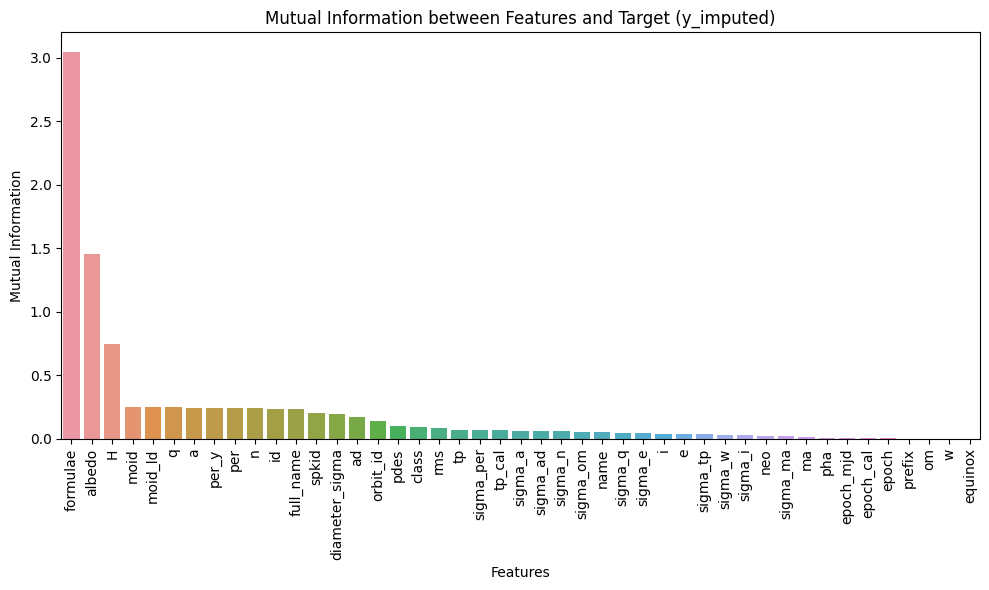

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot mutual information
plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info_df.index, y=mutual_info_df['Mutual Information'])

# Set plot labels and title
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information between Features and Target (y_imputed)')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [96]:
#Filter Formulae and albedo from X_2
X_2 = X_2[['formulae','albedo']]

In [97]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the dataset is in numeric format
X_2 = X_2.astype(float)
y_2 = y_2.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Define the neural network model
def build_model(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(input_dim,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dense(1)  # Output layer for regression
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Build and train the model
model = build_model(X_train.shape[1])

# Implement early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3281/3281 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 213.0384 - mse: 212.1592 - val_loss: 110.8189 - val_mse: 110.0057
Epoch 2/100
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 91.8366 - mse: 90.9900 - val_loss: 55.1183 - val_mse: 53.9816
Epoch 3/100
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 37.3842 - mse: 36.2243 - val_loss: 38.2060 - val_mse: 37.0136
Epoch 4/100
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 24.6610 - mse: 23.4793 - val_loss: 28.8939 - val_mse: 27.6938
Epoch 5/100
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 18.4021 - mse: 17.2006 - val_loss: 25.4731 - val_mse: 24.2878
Epoch 6/100
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 17.4512 - mse: 16.2595 - val_loss: 22.7793 - val_mse: 21.6231
Epoch 7/100
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 11.1134 - mse: 9.9825 - val_loss: 17.6606 - val_mse: 16.5459
Epoch 8/100
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 10.8804 - mse: 9.7863 - val_loss: 15.2876 - val_mse: 14.1926
Epoch 9/10

In [100]:
print(X_complete.columns)


Index(['formulae', 'albedo'], dtype='object')


In [104]:
X_complete['formulae'] = (X_complete['albedo'] * 10**(0.4 * X_complete['H'])) ** 0.5
X_complete = X_complete[['formulae','albedo']]
X_complete = scaler.fit_transform(X_complete)

In [105]:
#X_complete and y_complete are in numeric format
X_complete = X_complete.astype(float)
y_complete = y_complete.astype(float)

# Use the trained model to predict y_complete
y_pred_complete = model.predict(X_complete)

# Evaluate the model on X_complete
mse_complete = mean_squared_error(y_complete, y_pred_complete)
r2_complete = r2_score(y_complete, y_pred_complete)

# Print results
print(f"Complete Set Mean Squared Error: {mse_complete:.4f}")
print(f"Complete Set R² Score: {r2_complete:.4f}")

# Compare with test set results
if mse_complete > mse:
    print("Model performs worse on the complete dataset (higher MSE). Potential overfitting.")
elif mse_complete < mse:
    print("Model generalizes well to the complete dataset (lower MSE).")
else:
    print("Model performs similarly on both datasets.")


29954/29954 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step
Complete Set Mean Squared Error: 1841300717.0695
Complete Set R² Score: -0.0003
Model performs worse on the complete dataset (higher MSE). Potential overfitting.
